# Real Time Traffic-Status Supplied To Rennes Métropole By The Company Autoroutes Traffic.

#  Introduction

A decade ago, it was hard to access timely, accurate traffic data to support applications and services, such as traffic management, mapping and navigation, safety and emergency management, urban planning for smart cities, or location intelligence. Today, real-time traffic data is much more widely available as public datasets and commercial sources. At the same time, there are many more new applications and machine learning algorithms that use real-time traffic data to reduce congestion, guide drivers, and generate new insights for decision makers. 

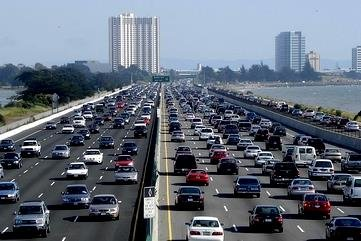

#  Methods for Collecting The Traffic Status

## 1 - Video Analytics 

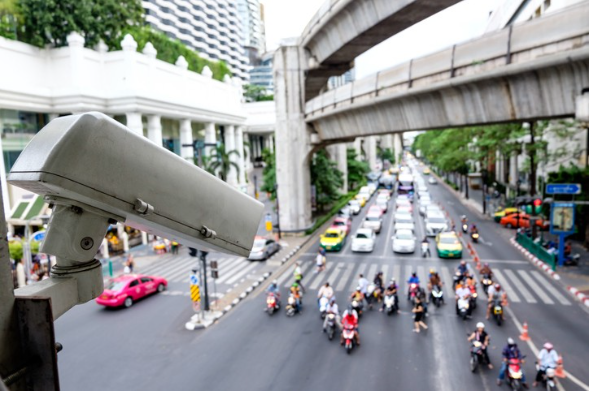

Many municipalities have deployed closed-circuit television (CCTV) systems for surveillance purposes. These can be used for measuring traffic.

•	Ongoing Cost: For municipalities that have already deployed video analytics systems, there is no extra data collection effort.

•	Coverage: 24/7/365 coverage



## 2-In-Roadway Traffic Flow Sensors

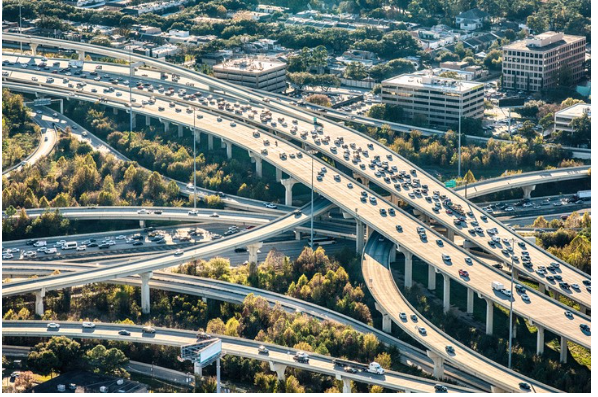

There are several types of in-roadway sensors that can be placed on roadways or within the pavement. They are another useful traffic data source.

•	Ongoing Cost: For municipalities that have already invested in sensors, this is an existing data source upon which they can capitalize.

•	Few Privacy Concerns: Sensors can detect vehicles passing over them but do not collect any information about those vehicles.

•	Coverage: 24/7/365



## 3-Connected Car Data

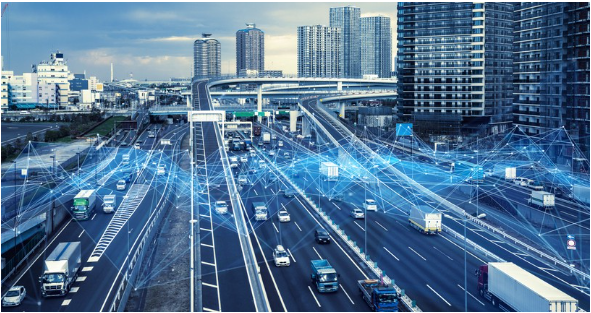

As more vehicles become connected via built-in telematics and onboard devices, connected cars have become a very useful and direct source of traffic data. Any other data sources are making some assumptions about how vehicles are behaving. Data can be collected directly from the vehicle’s electronic control units (ECUs) or Controller Access Networks (CANs). With solutions like the Otonomo Platform, it’s quite straightforward to access.

•	Low Cost: Essentially, each connected car is operating as a low-cost sensor, with no incremental installation or maintenance costs.

•	Data Richness: Connected car data offers more predictive value with richer data points beyond speed and location. These may include braking, air bag deployment, ambient temperature, windshield wiper operation, and more. Connected cars can also provide visibility into environmental events (e.g., road signs). Therefore, connected car data provides a more complete view of a geographic area and can support more complex use cases.

•	Data Privacy and De-identification: To enable data privacy safeguards, data passing through an OEM’s data centers can be stripped of identifiable information, such as the VIN. Location information, and other personally identifiable, so data must be aggregated as well. For example, Otonomo reduces the risk of exposing PII with the Dynamic Blurring Engine.

•	Consumer Consent: OEMs have the opportunity to educate buyers and obtain consent for data collection during the vehicle purchase process. Many commercial fleets already obtain employee consent for vehicle tracking and behavior monitoring.



# Describtion of The Data Set

Real-time traffic status. Data supplied to Rennes Métropole by the company Autoroutes Trafic.

These data have a “time limit” of 3 minutes, so it is normal that at 15:30, the most recent data indicates 15:27.

Description of the fields.

•	datetime: the date of the information in ISO 8601 format (https://www.iso.org/iso-8601-date-and-time-format.html)

•	predefinedLocationRerefence: the identifier of the Rennes Métropole section to which the information is attached. The identifier can be suffixed by “_D” and “_G” in the case of a double-way section. The scanning direction of the section is then the meaning “D”, the direction reverses the meaning “G”.

•	averageVehicleSpeed: the average speed of vehicles travelling on the section, kilometre per hour.

•	travelTime: the journey time of the section, in seconds.

•	travelTimeReliability: the reliability of the journey time provided, as a percentage of 0 % to 100 %.

•	trafficStatus: the traffic status on the section, the possible values are:

•	unknown: State unknown

•	FreeFlow: fluid

•	heavy: responsible

•	Congested: congested

•	impossible: traffic not possible


# DataSet Problems (Disadvanteges)

### Before We beign in Analysing this DataSet and Visualise It We Can Deduce THREE Main Problems or Disadvantages :

1-Date Time Column: In the column that should give us a breif description for the time when these record was taken we deduced that it was taken at the same day ,more over at the same second. 
Thus We could'nt make use of this column as there was no variance at all in the time of these record, except to convert it to a much clear format to see the day and the other features

2- Missing Describtions: The Second Problem We have Faced is that there are more than half of the Columns ( Features ) doesn't have any describtion which will surely affect the analyzing process and especialy in the Feature Engineering and in Creating new features. These missing info will also affect the final ML Model accuracy. As there are some features that are not Globaly known as gml_Id or predefinedlocationreference.

3- Missing Features: Despite the missing Describtions of some features there are also some missing features as Type of the vehicles that was recorded, where if we knew the type of veichle we could visualize it for example and see which type of vehicles that causes more  Congested trrafic, thus in the future we could make a model that suggest which route is better depending on your vehicle type.

In the end all these missing values and features ends up in making a not perfect Analysing Process which will eventually affect the ML Model that we could make in the future as to predict the best routs for you ( depending on your vehicle type ) 

# DataSet Advantages

Despite the previous disadvantages that We Faced there were also advantages and the main advantage is the realiabilty of this dataset and how much we can consider it as a Good Real DataSet that can Describe the Real-World situation.

1-Time: As we said these record were taken at the same instanse accross all the Rennes Traffic area and for the first sight we could say that this is a realiabile DataSet from simply seeing the numberr of records (2369) which is infact a very small amount of records considiring that the Rennes population isone of the most densely populated areas in France of 739,974 inhabitants so the trrafic capacity there should be about atleast 10000 records in a day. However Because this DataSet was only taken at the same instanse the number of records are the most perfect fitting number scaled to the real world scenairo.

2-Logic: This Data when Visualizing it We Deduced that at many of our Assumtions it gaved us a True plots for what is logicaly wise plots and Visulas.  

#  Contents  :

  EDA (Exploratory Data Analysis)
  
1-Understanding Data using Data Visualization methods

  Preprocessing

2-Feature Engineering

   - Converting The Date Time from Object To DateTime 64 format
        - Feature Engineering Using String Operation
          - Visualiztions of The New Features
             - Creating New Geospitial Features
             

          
3-Dealing with Outliers

   - Visulaizing The Outliers
      - Replacing Outliers Using The Z-Score
        - Replacing Outliers Using Local Indecies
          - Checking That We Removed The Outliers In Both Cases

4-Dealing with Missing Data
    
   - First : For Numerical Data
      - Checking The Index of The Missing Values
        - Get The Location index for all the NaN Values
          - Dropping Rows of Nan Values
          
   - Second: Categorical Data

5-Encoding Numerical and Categorical Data
  
   - First: Encoding Ordered Data  
     - Encoding Using Label Encoder ( Ordinal Encoder )
   - Second: Encoding Nominal Data 
      - Encoding Using One Hot Encoder
        - Encoding Using Binary Encoder Method
   - Removing Duplicated Columns
   - Preparing DataSet For Feature Scalling

6-Spliting DataSet into Training and Test Set

7-Feature Scalling


#  Importing Important Libraries 

In [86]:
from geopy.distance import great_circle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime 
import seaborn as sns
from datasist.structdata import detect_outliers

#  Reading The DataSet

In [87]:
df = pd.read_csv('E:\CDSP - AI - DIPLOMA\LEC 17 DATA CLEANSING , GEOSPITIAL , MISSING DATA\etat-du-trafic-en-temps-reel.csv',sep=";")

In [88]:
df

,datetime,predefinedlocationreference,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination
0,2022-06-24T12:55:00+02:00,213972_D,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin
1,2022-06-24T12:55:00+02:00,213972_G,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin
2,2022-06-24T12:55:00+02:00,213973_D,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin
3,2022-06-24T12:55:00+02:00,213973_G,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin
4,2022-06-24T12:55:00+02:00,213974_D,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin
...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24T12:55:00+02:00,9918,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137
2365,2022-06-24T12:55:00+02:00,9919,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137
2366,2022-06-24T12:55:00+02:00,9921_D,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34
2367,2022-06-24T12:55:00+02:00,9921_G,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34


In [89]:
df.describe(include='all')

,datetime,predefinedlocationreference,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination
count,2369,2369,2369.000000,2369.000000,2369.000000,2369,2244,2244,2244,2244.000000,2244.0,2098
unique,1,2361,NaN,NaN,NaN,3,2236,2236,2244,NaN,NaN,149
top,2022-06-24T12:55:00+02:00,54582,NaN,NaN,NaN,freeFlow,"48.107437324782566,-1.674712537092728","{""coordinates"": [[[-1.674526582, 48.1074400157...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,NaN,NaN,Route départementale 34
freq,2369,2,NaN,NaN,NaN,1376,2,2,1,NaN,NaN,84
mean,NaN,NaN,47.231743,11.886450,52.403546,NaN,NaN,NaN,NaN,1142.167558,666.0,NaN
std,NaN,NaN,23.722404,14.152918,31.130720,NaN,NaN,NaN,NaN,661.200066,0.0,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,666.0,NaN
25%,NaN,NaN,31.000000,4.000000,32.000000,NaN,NaN,NaN,NaN,569.750000,666.0,NaN
50%,NaN,NaN,43.000000,7.000000,60.000000,NaN,NaN,NaN,NaN,1137.500000,666.0,NaN
75%,NaN,NaN,59.000000,15.000000,75.000000,NaN,NaN,NaN,NaN,1717.250000,666.0,NaN


In [90]:
df.isna().sum()

datetime                         0
predefinedlocationreference      0
averagevehiclespeed              0
traveltime                       0
traveltimereliability            0
trafficstatus                    0
geo_point_2d                   125
geo_shape                      125
gml_id                         125
id                             125
func_class                     125
denomination                   271
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   datetime                     2369 non-null   object 
 1   predefinedlocationreference  2369 non-null   object 
 2   averagevehiclespeed          2369 non-null   int64  
 3   traveltime                   2369 non-null   int64  
 4   traveltimereliability        2369 non-null   int64  
 5   trafficstatus                2369 non-null   object 
 6   geo_point_2d                 2244 non-null   object 
 7   geo_shape                    2244 non-null   object 
 8   gml_id                       2244 non-null   object 
 9   id                           2244 non-null   float64
 10  func_class                   2244 non-null   float64
 11  denomination                 2098 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 222.2+ KB


# EDA ( Exploratory Data Analysis  ) 

#  1- Understanding The Data Set Using Visualizations 

In [92]:
df

,datetime,predefinedlocationreference,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination
0,2022-06-24T12:55:00+02:00,213972_D,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin
1,2022-06-24T12:55:00+02:00,213972_G,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin
2,2022-06-24T12:55:00+02:00,213973_D,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin
3,2022-06-24T12:55:00+02:00,213973_G,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin
4,2022-06-24T12:55:00+02:00,213974_D,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin
...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24T12:55:00+02:00,9918,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137
2365,2022-06-24T12:55:00+02:00,9919,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137
2366,2022-06-24T12:55:00+02:00,9921_D,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34
2367,2022-06-24T12:55:00+02:00,9921_G,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34


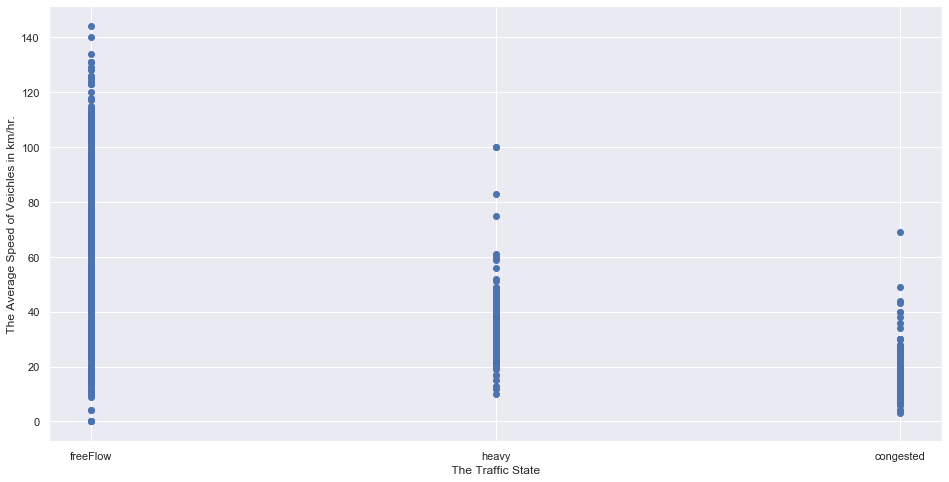

In [93]:
# Dtecting Outliers
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['trafficstatus'], df['averagevehiclespeed'])
ax.set_xlabel(' The Traffic State ')
ax.set_ylabel(' The Average Speed of Veichles in km/hr. ')
plt.show()

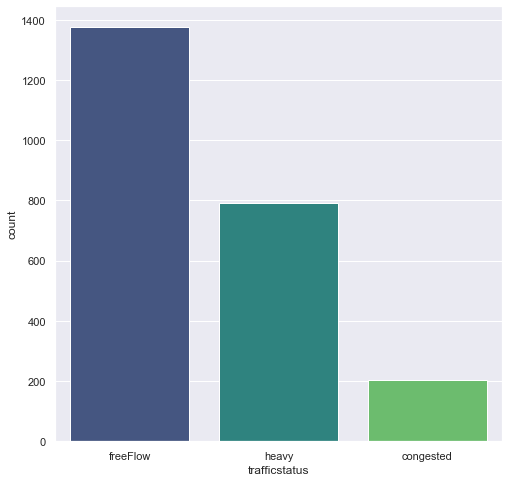

In [94]:
# This Plot also Confirms That at this time of day the traffic is fluid 
sns.set(rc={'figure.figsize':(8, 8)})
sns.countplot(x='trafficstatus', data=df, palette='viridis')

##  Using Dynamic Plots ( Plotly )

At This Histogram we will see the distribution between the travel time realiabilty and the average Speed but first we need to know what is travel time realiabilty means:

Someone who has a consistent 45-minute commute
has what you would call a reliable commute, as
long as the daily travel time doesn’t vary beyond
what they consider reasonable. But someone who
never knows from day to day whether it will take
30 minutes or an hour has an unreliable commute.
That uncertainty prompts people to pad their
commute time. Traffic planners call that padding
“Buffer Time,” the time one must add to reach
their destination as planned. 

Measuring and calculating that “Buffer Time”
creates what is called a “Buffer Time Index.”
Caltrans uses this index to identify which corridors
require assistance in smoothing out delays and
helps us measure the effectiveness of our solutions.

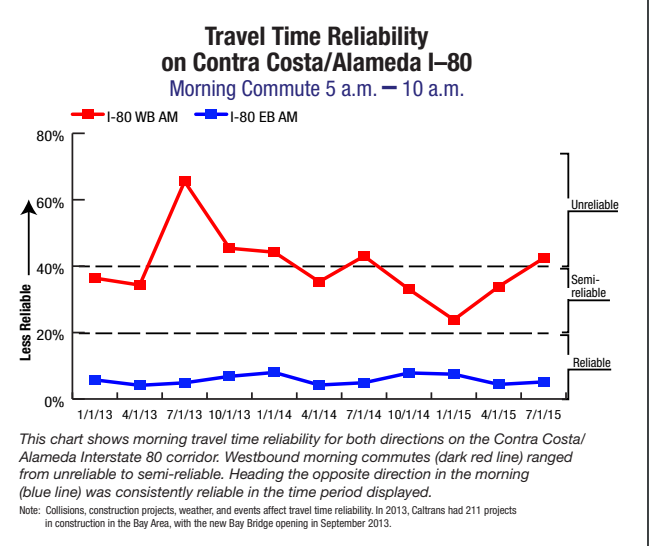

• Reliable travel means drivers need to add less than 20 percent travel time to the average trip to get to their destination on time 95 percent of the time. For example, on a 45-minute commute, drivers would need to pad their commute by nine minutes or less. 

• Moderately unreliable travel requires drivers to add 20 to 40 percent of travel time to get there on time 95 percent of the  time (padding their commute by as much as 18 minutes in a 45-minute commute). 


•  Unreliable travel means drivers must add more than 40 percent of travel time to get there on time 95 percent of the time (padding their commute by more than 18 minutes in a 45-minute commute).

Buffer Index (BI) is a measure of trip reliability that expresses the amount of extra
buffer time needed to be on time for 95 percent of the trips. This measure allows the traveler to
estimate the extra percent of travel time that the trip may take due to varying congestion level.



In [95]:
# From What is said the drivers realiabity percentage that ranges from 0 -4 is highly realaiable time which means that the drivers are sure from the time they will arrive to thier destinations 
# Thus in order the drivers be sure that they will arrive on time the fraffic status should be a 90 % free flow which is actually representef in this histogram
# Thus thats another example that shows us that this data is data is logicaly arranged which means that it's a real world case.
fig = px.histogram(df, 
             x='traveltimereliability', 
             y='averagevehiclespeed',
             color='trafficstatus',
             marginal='histogram') 
fig.show()

In [96]:
# From This Heatmap we can deduce that there is a a great relationship at Average Speed from 40 - 49 the time realiabilty is from 60 - 69 which that it's un realiable
# While at average speed from 50 - 59 there is a big relationship with time realiabilty from 0 - 9 thus a good realiable time.
fig = px.density_heatmap(df, x = "averagevehiclespeed", y = "traveltimereliability", marginal_x ='box' ,
                         marginal_y = "histogram", height = 800, width = 1000, text_auto = True,
                         labels={'averagevehiclespeed':'Average Speed','traveltimereliability':'Time Reliabilty'},
                         title = "Density heatmap between Average Speed and Time Rliability")
fig.show()

In [97]:
# From here we can say that at travel time from 0-4 sec there is a very high realtionship between it and a speed from 40-49 which is from previous heatmap is a realiable time.
fig = px.density_heatmap(df, x = "averagevehiclespeed", y = "traveltime", marginal_x ='box' ,
                         marginal_y = "histogram", height = 800, width = 1000, text_auto = True,
                         labels={'averagevehiclespeed':'Average Speed','traveltime':'Time'},
                         title = "Density heatmap between Average Speed and Time")
fig.show()

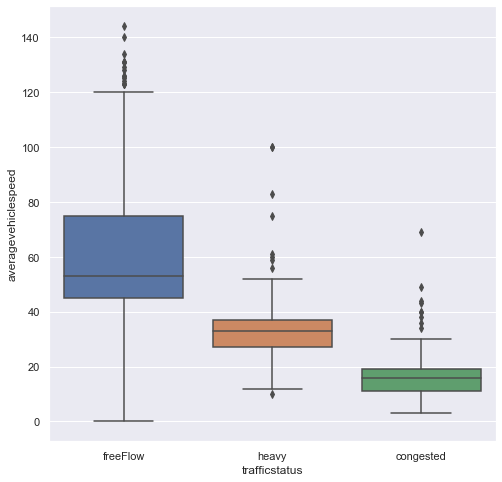

In [98]:
# From Here We Can Detect that the are Outliers
# From Here We Can Deduce That The Traffic is mostly fluid at This Time Thus it can be recommended to drive through it at this time
# Also The avreage range of speed is from (44 - 78 km/h) Thus accidents dueto speed are most likely not to happen at these low speeds
sns.boxplot(x="trafficstatus", y="averagevehiclespeed", data=df)

In [99]:
df['averagevehiclespeed'].value_counts()

40     68
35     60
43     57
49     57
41     56
       ..
113     1
134     1
117     1
140     1
105     1
Name: averagevehiclespeed, Length: 126, dtype: int64

In [100]:
df['averagevehiclespeed'].unique()

array([ 46,  43,  47,  40,  54,  41,  23,  55,  48,  45,  50,  25,  42,
        34,   9,  35,  31,  18,  62,  14,  10,  38,  32,  52,  53,  27,
        15, 112,  37,  59,  77,  70,  58,  85,  20,  60,  28,  89,  79,
        82,  57,  86,  49,  16,  29,  21,  76,  44,  39,  26,  22,  19,
         6,  30,  12,  33,  36,  11,  83,  80,  78,  73,  71,  51,  81,
        88,  24,  69,  90,  66, 102,  17,  64,  63,  87,  56,  75,  94,
        68,  84,  96,  93,  61, 101, 140, 109, 117,  67,  95,   0,  74,
        92, 108,  99, 110, 106,  65,  72, 144,  98,  97, 107, 126,   7,
       134, 100,  13,  91, 104, 114, 113, 103, 124, 128,   8,   4, 120,
       111,   3, 123, 129, 131, 118, 115, 125, 105], dtype=int64)

In [189]:
df['High_Speed'] = df['averagevehiclespeed'].apply(lambda x: x if x > 80 else 0)

In [190]:
df['Medium_Speed'] = df['averagevehiclespeed'].apply(lambda x: x if x > 50 and x < 80 else 0)

In [191]:
df['Low_Speed'] = df['averagevehiclespeed'].apply(lambda x: x if x < 50 else 0)

#  Preprocessing

# 2- Feature Engineering

In This Part We will Focus On Extracting New Features From Those We Have Already In Order To Have A Wider Visulzations For The Data Set And Whch Will Help Our Future ML Model To Understand The Correleations Between Every Features. 
We Will Use Various Methods Of Feature Engineering As String Operations, Geospetial Features and Date Time Functions.

## Converting The Date Time from Object To DateTime 64 format

Generaly This Method IS Used To Create Diffrent Features From The Date at This Time As Season Time,Hours,Days Or Even Weeks.
From These Information We Can:

- Make Count Plots: To Create a Link between The Month or The Season with The Denomination Using Traffic Status as Hue To See What is The Most Popular Season Where The Traffic are Very High or Very Low To Recommend Moving in at This Route.
- Make Box Plots: To See The Outliers and Remove Them In The Process of Dealing With Outliers.
- Make Matrix Plots: To See The Correlations Between This Features With The Other Features In The Data Set. 


However, In Our Case There Is No Variation In Time , Thus The Only Thing We Can Get From This Column Is To Know The Information about the Time These Record Were Recorded And Make Some Predictions and Assumtions To Help Us Understand More The Correlations.

In [112]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   datetime                     2369 non-null   datetime64[ns, pytz.FixedOffset(120)]
 1   predefinedlocationreference  2369 non-null   object                               
 2   averagevehiclespeed          2369 non-null   int64                                
 3   traveltime                   2369 non-null   int64                                
 4   traveltimereliability        2369 non-null   int64                                
 5   trafficstatus                2369 non-null   object                               
 6   geo_point_2d                 2244 non-null   object                               
 7   geo_shape                    2244 non-null   object                               
 8   gml_id  

In [113]:
df['datetime'].dt.minute.unique()

array([55], dtype=int64)

In [114]:
df['datetime'].dt.day.unique()

array([24], dtype=int64)

In [115]:
df['datetime'].dt.month.unique()

array([6], dtype=int64)

From This Date ( 24-6-2022 ) We Can Say That The Time Were This Data Set Was Taken was At The Summer and in the Mid of The Year Which Means That This Is The Most Time In The Year Which Have Densely Traffic.
Thus This Data Can Actualy Be Realiable To Represent The Trffaif of This City In The End.  ( Advantage )

## Feature Engineering Using String Operation

Here We will Use The String Operation Functions Especially The Split Function To Create a New Column Feature Which will Be Called "Location_Status"  To Represent The Direction Of Scanning Which This the identifier of the Rennes Métropole section Gave Us Which Will Take The Letter  " D " , While The Reverse (Oppesite) Direction Of The Scan Will Take The Letter " G " .

In [116]:
df['predefinedlocationreference'].str.split('_').str[1]

0         D
1         G
2         D
3         G
4         D
       ... 
2364    NaN
2365    NaN
2366      D
2367      G
2368      G
Name: predefinedlocationreference, Length: 2369, dtype: object

In [117]:
# We Can't get any criritcal Info from predefinedlocationreference since it's just a refrence. 
# We will extract Two Important Features which are The Status and Id of the Location Using The Split Function.
# Where if you entered the "type" as 'D' it splits The "predefinedlocationreference" TO "D" or "G"
# If "typ" entered as "id" it gives The Location Id Number.

def splt(typ='D'):
    if typ == 'D':
        return df['predefinedlocationreference'].str.split('_').str[1]
    elif typ=='id':
        return df['predefinedlocationreference'].str.split('_').str[0]

In [118]:
df['Location_Status'] = splt(typ='D')
df

,datetime,predefinedlocationreference,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status
0,2022-06-24 12:55:00+02:00,213972_D,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D
1,2022-06-24 12:55:00+02:00,213972_G,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G
2,2022-06-24 12:55:00+02:00,213973_D,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D
3,2022-06-24 12:55:00+02:00,213973_G,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G
4,2022-06-24 12:55:00+02:00,213974_D,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,9918,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,0,0,49,NaN
2365,2022-06-24 12:55:00+02:00,9919,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,0,53,0,NaN
2366,2022-06-24 12:55:00+02:00,9921_D,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D
2367,2022-06-24 12:55:00+02:00,9921_G,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,0,77,0,G


In [119]:
df['Location_ID'] = splt(typ='id')
df

,datetime,predefinedlocationreference,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID
0,2022-06-24 12:55:00+02:00,213972_D,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D,213972
1,2022-06-24 12:55:00+02:00,213972_G,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972
2,2022-06-24 12:55:00+02:00,213973_D,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D,213973
3,2022-06-24 12:55:00+02:00,213973_G,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973
4,2022-06-24 12:55:00+02:00,213974_D,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,9918,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,0,0,49,NaN,9918
2365,2022-06-24 12:55:00+02:00,9919,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,0,53,0,NaN,9919
2366,2022-06-24 12:55:00+02:00,9921_D,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D,9921
2367,2022-06-24 12:55:00+02:00,9921_G,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,0,77,0,G,9921


In [120]:
df.drop('predefinedlocationreference',axis=1,inplace=True)

In [121]:
# From This graph we can see that the most densily number of points (2nd Percentile (50%-75%)) is at travel time range from (0-18) and at average speed ranges from(19-56 km/hr).
fig = px.scatter(df, 
             y='traveltime', 
             x='averagevehiclespeed',
             color='Location_Status') 
fig.show()

In [129]:
df

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
0,2022-06-24 12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
2,2022-06-24 12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,0,0,49,NaN,9918,48.040525302267426,-1.6839897411468427,Châtillon-sur-Seiche
2365,2022-06-24 12:55:00+02:00,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,0,53,0,NaN,9919,48.03973408291705,-1.684216716754925,Châtillon-sur-Seiche
2366,2022-06-24 12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche
2367,2022-06-24 12:55:00+02:00,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,0,77,0,G,9921,48.040342468946484,-1.680835142460134,Châtillon-sur-Seiche


In [130]:
df['lat'] = df['geo_point_2d'].str.split(',').str[0]

In [131]:
df['long'] = df['geo_point_2d'].str.split(',').str[1]

## Creating New Geospitial Features

Here we are going To Create a new feature To Our dataset which will be the Suburbs of the given latitude and longitude. The Reason why we will create it is to make a better Visulizations for our Data Set as Suburbs as we know is a wide range area which means that any distrubitions using the Suburbs will be much more clear for distinguishing the diifrences, as it will maximize these diffrences as much as possible to be seen easily biggest and thes Smallest between the different features.(We will use suburbs only in understanding the data only not to make any detailed analysis since the aim of Visiual plots is to deduce the corelations between each feature and the other from the first view  not to make a computed analysis).

However, after the Visualization process we wil delete this Suburb column as it contains too much missing data which will affect badely our M.L Model in the Future as we can't give the model a column with this much of missing data or even replace all of them by mode for example.

In [124]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Data Science course")

In [125]:
location = geolocator.reverse("48.11611841267346,-1.7173241774343833")
location.raw['address']

{'amenity': 'Evocime CTI Advanced',
 'road': 'Rue de Vezin',
 'quarter': 'Kennedy',
 'commercial': 'Atalante-Champeaux',
 'suburb': 'Villejean - Beauregard',
 'city_district': 'Quartiers Nord-Ouest',
 'city': 'Rennes',
 'municipality': 'Rennes',
 'county': 'Ille-et-Vilaine',
 'ISO3166-2-lvl6': 'FR-35',
 'state': 'Bretagne',
 'ISO3166-2-lvl4': 'FR-BRE',
 'region': 'France métropolitaine',
 'postcode': '35043',
 'country': 'France',
 'country_code': 'fr'}

In [126]:
location = geolocator.reverse("48.040525302267426,-1.6839897411468427")
location.raw

{'place_id': 147011424,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 173443742,
 'lat': '48.040382498505465',
 'lon': '-1.6839599723868317',
 'display_name': 'Les Morriers, Châtillon-sur-Seiche, Noyal-Châtillon-sur-Seiche, Rennes, Ille-et-Vilaine, Bretagne, France métropolitaine, 35230, France',
 'address': {'hamlet': 'Les Morriers',
  'suburb': 'Châtillon-sur-Seiche',
  'village': 'Noyal-Châtillon-sur-Seiche',
  'municipality': 'Rennes',
  'county': 'Ille-et-Vilaine',
  'ISO3166-2-lvl6': 'FR-35',
  'state': 'Bretagne',
  'ISO3166-2-lvl4': 'FR-BRE',
  'region': 'France métropolitaine',
  'postcode': '35230',
  'country': 'France',
  'country_code': 'fr'},
 'boundingbox': ['48.0398915', '48.0403939', '-1.6842064', '-1.683431']}

In [127]:
location = geolocator.reverse("48.08759135050689,-1.660886625381263")
location.raw['address']['suburb']

'Le Blosne'

In [128]:
def sub(x):
    try:
        location = geolocator.reverse(f"{x['lat']}, {x['long']}")
        return location.raw['address']['suburb']
    except:
        return np.nan

df['Suburb'] = df.apply(sub, axis=1)

In [132]:
df.lat.isna().sum()

125

In [133]:
len(df.denomination.unique())

150

In [134]:
len(df.Suburb.unique())

20

In [135]:
df.Suburb.isna().sum()

863

### Visualiztions of The New Features

In [136]:
# Here We Are Going To Create a Special New Matrix of the Top 10 Reapeated Average Speed 
# We Made That In Order To Visualise and Understand the distrubution of the diffrent speeds with Respect TO The Direction of The Scanning.
sub_10_index = df['averagevehiclespeed'].value_counts().head(10).index
top_10 = df[df['averagevehiclespeed'].isin(sub_10_index)]
top_10

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
6,2022-06-24 12:55:00+02:00,41,5,60,freeFlow,"48.141660552939385,-1.6574809651641385","{""coordinates"": [[[-1.6575397503, 48.141431980...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_60d,242.0,666.0,Avenue Général George S. Patton,0,0,41,D,282910,48.141660552939385,-1.6574809651641385,Maurepas - Patton
10,2022-06-24 12:55:00+02:00,48,7,0,freeFlow,"48.12907396163776,-1.644949320991264","{""coordinates"": [[[-1.6455187154, 48.128927180...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_916,1019.0,666.0,Rue de Fougères,0,0,48,D,45029,48.12907396163776,-1.644949320991264,Jeanne d'Arc - Longs Champs - Beaulieu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2022-06-24 12:55:00+02:00,35,3,60,heavy,"48.044272793168055,-1.6647101629427858","{""coordinates"": [[[-1.6645033119, 48.044292429...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e00,2277.0,666.0,Route départementale 34,0,0,35,G,9757,48.044272793168055,-1.6647101629427858,Châtillon-sur-Seiche
2354,2022-06-24 12:55:00+02:00,43,23,60,heavy,"48.04435841518888,-1.6639110597677365","{""coordinates"": [[[-1.6633168999, 48.044424597...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e02,2279.0,666.0,Route départementale 34,0,0,43,G,9758,48.04435841518888,-1.6639110597677365,Noyal-sur-Seiche
2358,2022-06-24 12:55:00+02:00,48,3,100,freeFlow,"48.03998527220697,-1.6841647971647506","{""coordinates"": [[[-1.6842415149, 48.040140342...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e05,2282.0,666.0,NaN,0,0,48,NaN,9913,48.03998527220697,-1.6841647971647506,Châtillon-sur-Seiche
2360,2022-06-24 12:55:00+02:00,36,3,100,heavy,"48.03996927949149,-1.683557191811759","{""coordinates"": [[[-1.6837039987, 48.039872639...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e07,2284.0,666.0,NaN,0,0,36,NaN,9915,48.03996927949149,-1.683557191811759,Châtillon-sur-Seiche


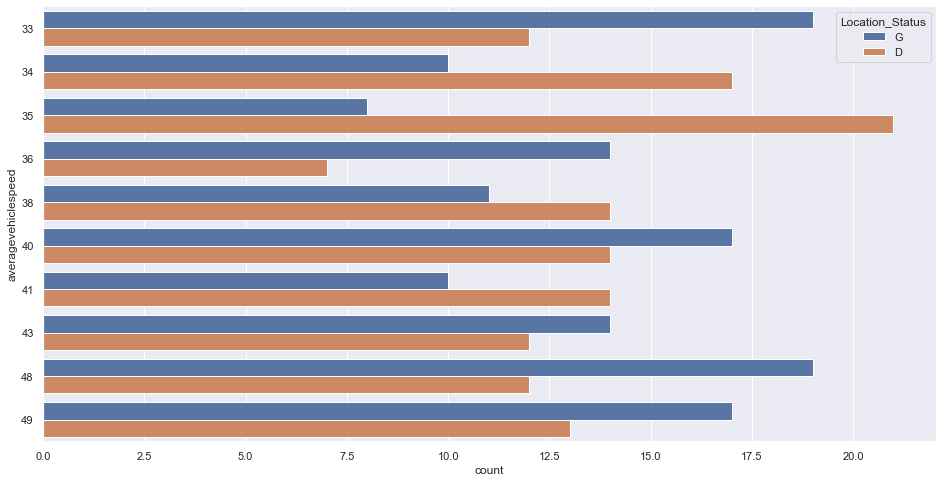

In [137]:
# Since we created this new feature we can now easily make various plots to analyze it with the diffrenet features 
sns.set(rc={'figure.figsize':(16, 8)})
sns.countplot(data=top_10,y='averagevehiclespeed',hue='Location_Status')

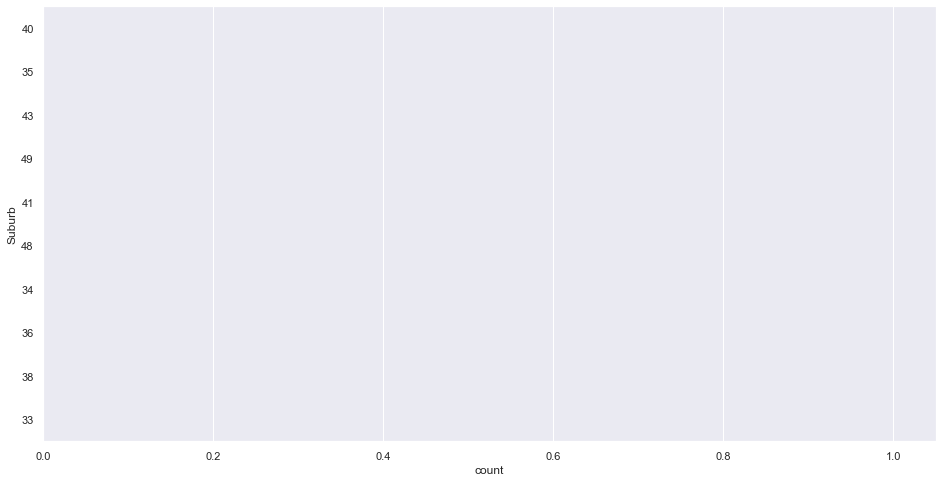

In [138]:
# From This plot we Can Deduce That Chatilion-sur-Seiche is The most Suburb that have the highest number of traffic
# Thus We Can Expect That in this Suberb the traffic flow would be free flow

sns.countplot(data=top_10,y='Suburb',order=sub_10_index)

In [40]:
# We Can see that Chatilion-sur-Seiche is The most place where The average speed is the highest.
# While The Most Place that have The Lowest Average Speed Is the Rue de Nantes.
# Thus We Can Assume That Chatilion-sur-Seiche have a Free Flow Traffic as the average speeds are high, while Rue de Nantes has a congested or heavy traffic. 

fig = px.bar(top_10, y='averagevehiclespeed',
             x='Suburb',
            color='trafficstatus')
fig.show()

In [45]:
df

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,Location_Status,Location_ID,lat,long,Suburb
0,2022-06-24T12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard
1,2022-06-24T12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
2,2022-06-24T12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard
3,2022-06-24T12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24T12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24T12:55:00+02:00,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,NaN,9918,48.040525302267426,-1.6839897411468427,NaN
2365,2022-06-24T12:55:00+02:00,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,NaN,9919,48.03973408291705,-1.684216716754925,NaN
2366,2022-06-24T12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,D,9921,48.04023708494653,-1.6808048996880336,NaN
2367,2022-06-24T12:55:00+02:00,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,G,9921,48.040342468946484,-1.680835142460134,NaN


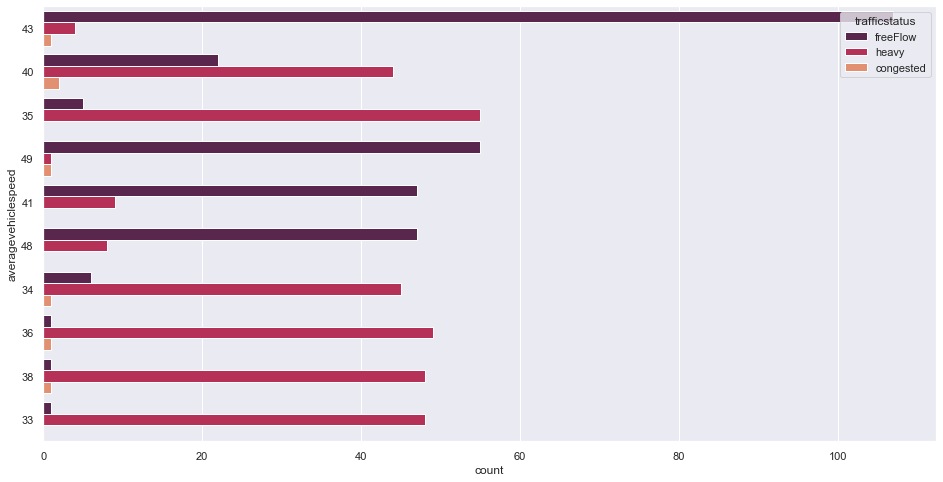

In [117]:
# Cheching Our Assumtion.
# Here We can see that our assumtion was True as the Highest number of heavy and congested traffic is in the Rue de Nantes. 
# While The Route départementale 34 has a free flow traffic as the most frequent one .

sns.countplot(data=top_10,y='averagevehiclespeed',order=sub_10_index,hue='trafficstatus',palette='rocket')

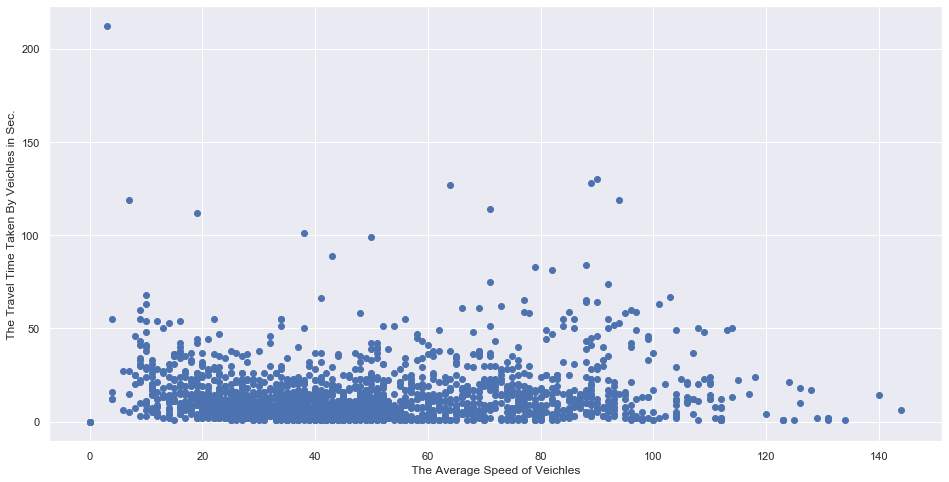

In [139]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['averagevehiclespeed'], df['traveltime'])
ax.set_xlabel(' The Average Speed of Veichles ')
ax.set_ylabel(' The Travel Time Taken By Veichles in Sec. ')
plt.show()

In [140]:
sub_10_index = df['Suburb'].value_counts().head(10).index
sub_10_index

Index(['Francisco-Ferrer - Vern - Poterie',
       'Bourg l'Évesque - La Touche - Moulin du Comte',
       'Thabor - Saint-Hélier - Alphonse Guérin', 'Sud-Gare', 'Centre',
       'Villejean - Beauregard', 'Le Blosne', 'Bréquigny', 'Maurepas - Patton',
       'Nord - Saint-Martin'],
      dtype='object')

In [141]:
top_10 = df[df['Suburb'].isin(sub_10_index)]
top_10

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
0,2022-06-24 12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
2,2022-06-24 12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2022-06-24 12:55:00+02:00,93,10,100,freeFlow,"48.08141387710801,-1.6544559568587875","{""coordinates"": [[[-1.6561077814, 48.081371187...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_dc6,2219.0,666.0,Route nationale 136,93,0,0,NaN,9074,48.08141387710801,-1.6544559568587875,Le Blosne
2306,2022-06-24 12:55:00+02:00,56,13,74,freeFlow,"48.080171192827116,-1.6805932968543305","{""coordinates"": [[[-1.6792064286, 48.080309474...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_dd2,2231.0,666.0,Route nationale 136,0,56,0,NaN,9131,48.080171192827116,-1.6805932968543305,Bréquigny
2333,2022-06-24 12:55:00+02:00,78,15,75,freeFlow,"48.08139664414172,-1.6602276599617303","{""coordinates"": [[[-1.6580649458, 48.081450388...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_dee,2259.0,666.0,Route nationale 136,0,78,0,NaN,9378,48.08139664414172,-1.6602276599617303,Le Blosne
2334,2022-06-24 12:55:00+02:00,90,12,100,freeFlow,"48.08128098157417,-1.6602565221319647","{""coordinates"": [[[-1.6623465738, 48.081227934...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_def,2260.0,666.0,Route nationale 136,90,0,0,NaN,9379,48.08128098157417,-1.6602565221319647,Le Blosne


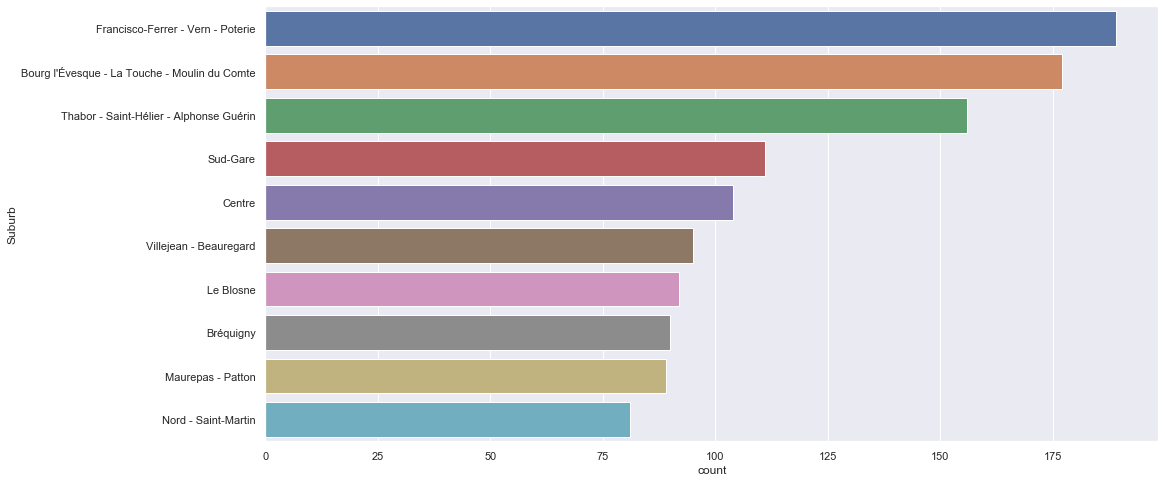

In [142]:
# From This plot we Can Deduce That the first three Suburbs  are The most Suburbs that have the highest number of traffic
# Thus We Can Expect That in this Suberb the traffic flow would be Congested or heavy while in the others the traffic should much less crowded and highly fluid

sns.countplot(data=top_10,y='Suburb',order=sub_10_index)

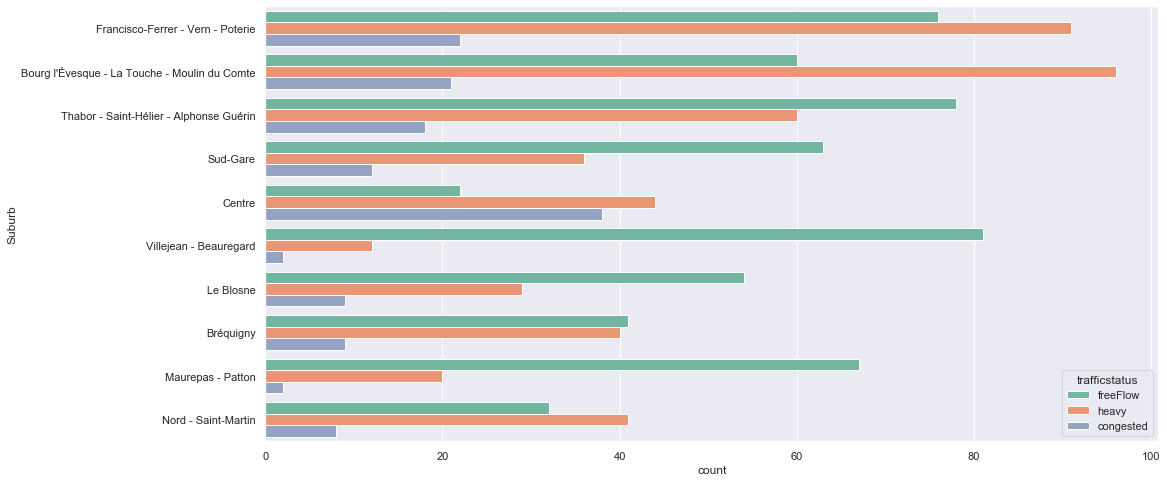

In [143]:
#Cheking Assumtions
sns.countplot(data=top_10,y='Suburb',order=sub_10_index,hue='trafficstatus',palette='Set2')

In [144]:
sub_10_index = df['denomination'].value_counts().head(10).index
sub_10_index

Index(['Route départementale 34', 'Route nationale 136', 'Rue de Nantes',
       'Route départementale 29', 'Rue de Châteaugiron', 'Rue de Lorient',
       'Rue de Vern', 'Rue de Fougères', 'Avenue Général George S. Patton',
       'Avenue Henri Fréville'],
      dtype='object')

In [145]:
top_10 = df[df['denomination'].isin(sub_10_index)]
top_10

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
6,2022-06-24 12:55:00+02:00,41,5,60,freeFlow,"48.141660552939385,-1.6574809651641385","{""coordinates"": [[[-1.6575397503, 48.141431980...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_60d,242.0,666.0,Avenue Général George S. Patton,0,0,41,D,282910,48.141660552939385,-1.6574809651641385,Maurepas - Patton
7,2022-06-24 12:55:00+02:00,23,8,0,freeFlow,"48.141678847173225,-1.6576399122546426","{""coordinates"": [[[-1.6575690238, 48.141908873...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_60e,243.0,666.0,Avenue Général George S. Patton,0,0,23,G,282910,48.141678847173225,-1.6576399122546426,Maurepas - Patton
8,2022-06-24 12:55:00+02:00,47,6,25,freeFlow,"48.096217086804884,-1.6400969487792438","{""coordinates"": [[[-1.6404874722, 48.096426254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_777,604.0,666.0,Rue de Châteaugiron,0,0,47,D,420870,48.096217086804884,-1.6400969487792438,Francisco-Ferrer - Vern - Poterie
9,2022-06-24 12:55:00+02:00,55,5,60,freeFlow,"48.09630138474286,-1.6399963345247905","{""coordinates"": [[[-1.6396058109, 48.096092216...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_778,605.0,666.0,Rue de Châteaugiron,0,55,0,G,420870,48.09630138474286,-1.6399963345247905,Francisco-Ferrer - Vern - Poterie
10,2022-06-24 12:55:00+02:00,48,7,0,freeFlow,"48.12907396163776,-1.644949320991264","{""coordinates"": [[[-1.6455187154, 48.128927180...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_916,1019.0,666.0,Rue de Fougères,0,0,48,D,45029,48.12907396163776,-1.644949320991264,Jeanne d'Arc - Longs Champs - Beaulieu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,2022-06-24 12:55:00+02:00,43,23,60,heavy,"48.04435841518888,-1.6639110597677365","{""coordinates"": [[[-1.6633168999, 48.044424597...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e02,2279.0,666.0,Route départementale 34,0,0,43,G,9758,48.04435841518888,-1.6639110597677365,Noyal-sur-Seiche
2362,2022-06-24 12:55:00+02:00,54,3,75,freeFlow,"48.040211745959,-1.6844580299741205","{""coordinates"": [[[-1.6842321209, 48.040193938...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e09,2286.0,666.0,Route départementale 34,0,54,0,D,9917,48.040211745959,-1.6844580299741205,Châtillon-sur-Seiche
2363,2022-06-24 12:55:00+02:00,46,3,100,freeFlow,"48.04010455238925,-1.6844768175847271","{""coordinates"": [[[-1.6847027262, 48.040122359...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0a,2287.0,666.0,Route départementale 34,0,0,46,G,9917,48.04010455238925,-1.6844768175847271,Châtillon-sur-Seiche
2366,2022-06-24 12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche


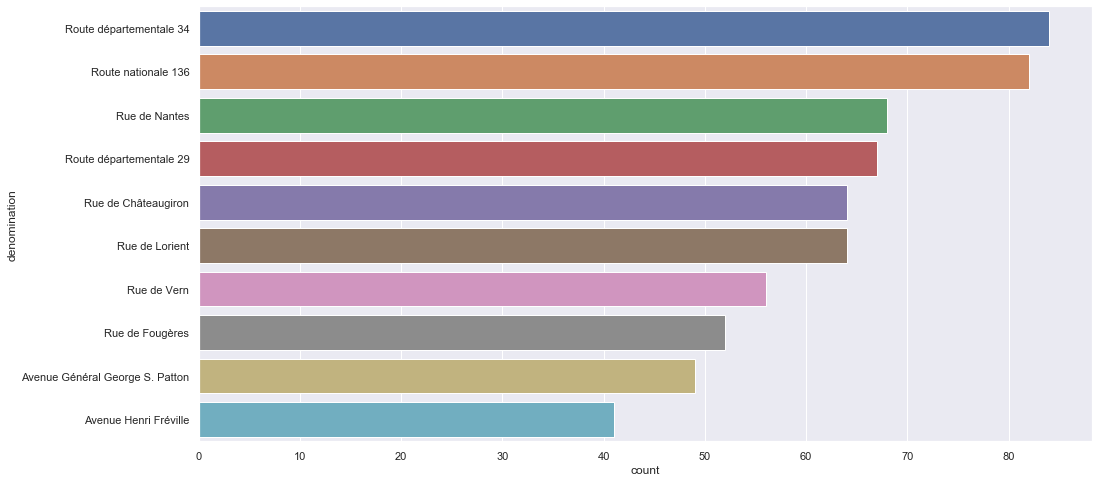

In [146]:
# From This plot we Can Deduce The Diffrence discussed before about Creating and using The Suburb column to increase the diffrences between each suburb in order to simplify the visualization
# From this chart we can assume that the Route départementale 34 , Route nationale 136, have the most fluid traffic because of that most of the veihchles perefer these routes and thats why they have the most population
# While on the other hand Avenue Henri Fréville will have a heavy traffic as it has the lowest vhiechle population
sns.countplot(data=top_10,y='denomination',order=sub_10_index)

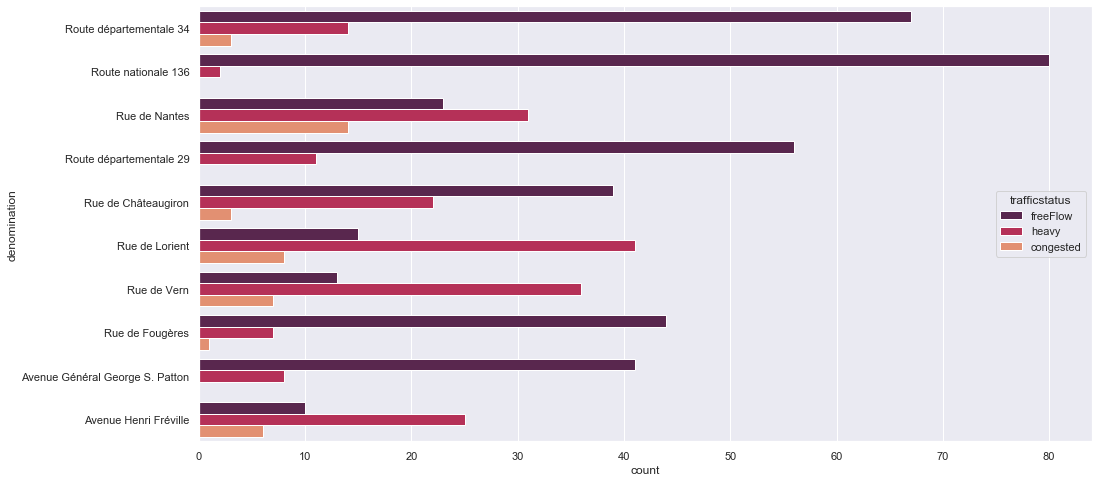

In [147]:
# Cheching Our Assumtion.
# Here We can see that our assumtion was True as the Highest number of heavy and congested traffic is in the last suburb. 
# Thus the probability of cars being stuck in this suburb due to traffic conditions is the most frequent than Other Suburbs.

sns.countplot(data=top_10,y='denomination',order=sub_10_index,hue='trafficstatus',palette='rocket')

# 3- Dealing With Outliers

When we deal with outliers we should first know in which column is there an outlier and this can be easily distinguished from the describe function and examining the max number of each column.

Second we should

In [148]:
df.describe(include='all')

C:\Users\Seif\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
count,2369,2369.000000,2369.000000,2369.000000,2369,2244,2244,2244,2244.000000,2244.0,2098,2369.000000,2369.000000,2369.000000,1064,2369,2244,2244,1506
unique,1,NaN,NaN,NaN,3,2236,2236,2244,NaN,NaN,149,NaN,NaN,NaN,2,1831,2236,2236,19
top,2022-06-24 12:55:00+02:00,NaN,NaN,NaN,freeFlow,"48.107437324782566,-1.674712537092728","{""coordinates"": [[[-1.674526582, 48.1074400157...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,NaN,NaN,Route départementale 34,NaN,NaN,NaN,D,213972,48.107437324782566,-1.674712537092728,Francisco-Ferrer - Vern - Poterie
freq,2369,NaN,NaN,NaN,1376,2,2,1,NaN,NaN,84,NaN,NaN,NaN,534,2,2,2,189
first,2022-06-24 12:55:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-06-24 12:55:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,47.231743,11.886450,52.403546,NaN,NaN,NaN,NaN,1142.167558,666.0,NaN,11.328831,15.641621,21.865344,NaN,NaN,NaN,NaN,NaN
std,NaN,23.722404,14.152918,31.130720,NaN,NaN,NaN,NaN,661.200066,0.0,NaN,31.008805,27.387352,18.220056,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,666.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,31.000000,4.000000,32.000000,NaN,NaN,NaN,NaN,569.750000,666.0,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


##  First : Visulaizing  The Outliers

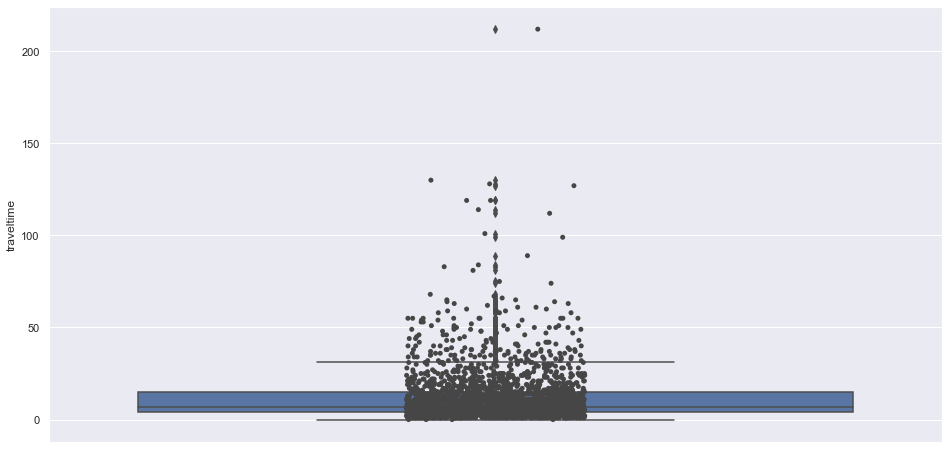

In [149]:
# From The Box Plot We Can deduce That there is an Outliers

sns.set(rc={'figure.figsize':(16, 8)})
sns.boxplot(data=df , y=df['traveltime'])
sns.stripplot(y=df['traveltime'], data=df, color="#474646")

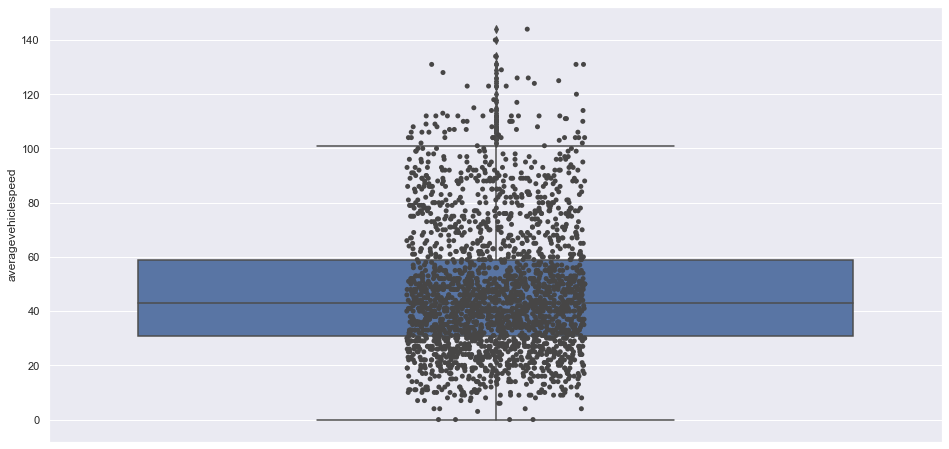

In [150]:
sns.set(rc={'figure.figsize':(16, 8)})
sns.boxplot(data=df , y=df['averagevehiclespeed'])
sns.stripplot(y=df['averagevehiclespeed'], data=df, color="#474646")

##  Replacing Outliers Using The Z-Score

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score and Outliers:

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier

In [151]:
from scipy import stats
 
z = np.abs(stats.zscore(df['traveltime']))
out = df.loc[z>3.5].index
len(out)

26

In [153]:
df['traveltime'].iloc[out] = df['traveltime'].median()

In [154]:
df['traveltime'][188]

7

##  Replacing Outliers Using Local Indecies

Here We are going to replace the Outliers using thier indicies.
We will do this method on the averagevheichlespeed feature, we noticed that the outliers began to appear after a value of 105 km/hr, thus we will use it to distinguish the indices of any speed that is above 105.

In [155]:
out_loc = df.loc[df['averagevehiclespeed']>=105].index
out_loc

Int64Index([  46,  262,  264,  265,  312,  329,  371,  372,  373,  374,  386,
             388,  414,  449,  450,  494,  495,  513,  529,  645,  649,  650,
             654,  677,  681, 1272, 1467, 1474, 1480, 1677, 1842, 1843, 1844,
            1845, 1846, 1906, 1907, 1910, 1981, 2018, 2019, 2215, 2216, 2219,
            2236, 2241, 2243, 2244, 2245, 2254, 2255, 2261, 2329, 2330, 2368],
           dtype='int64')

In [156]:
out_loc

Int64Index([  46,  262,  264,  265,  312,  329,  371,  372,  373,  374,  386,
             388,  414,  449,  450,  494,  495,  513,  529,  645,  649,  650,
             654,  677,  681, 1272, 1467, 1474, 1480, 1677, 1842, 1843, 1844,
            1845, 1846, 1906, 1907, 1910, 1981, 2018, 2019, 2215, 2216, 2219,
            2236, 2241, 2243, 2244, 2245, 2254, 2255, 2261, 2329, 2330, 2368],
           dtype='int64')

In [157]:
# In This case the number of outliers is almost 5 % of the values of the traffic data 
# Although It Seems a small percentage of the total data However we must remember that we still have missing values which we didn't handel yet
# Thus we will not drop these outliers to keep the rest of the data in the other columns as they are and will replace them by the median.
len(out)+len(out_loc)

81

In [158]:
df['averagevehiclespeed'].iloc[out_loc] = df['averagevehiclespeed'].median()

In [159]:
df['averagevehiclespeed'][262]

43

##  Checking That We Removed The Outliers In Both Cases

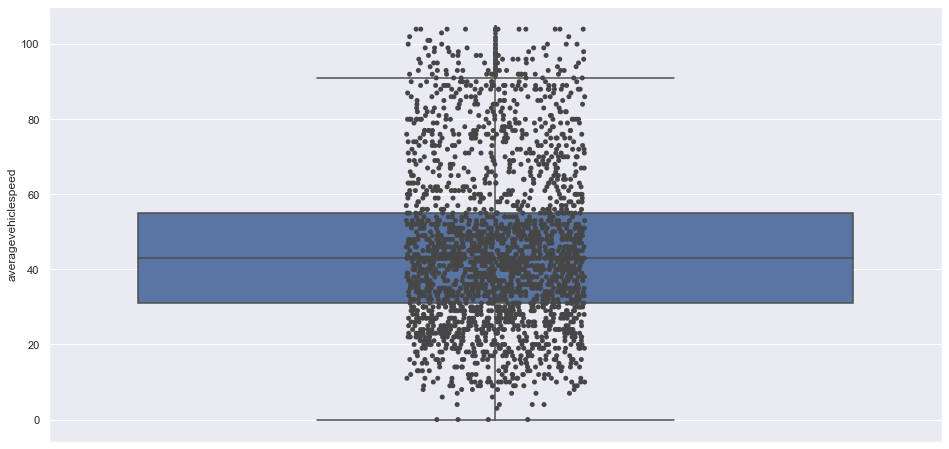

In [160]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['averagevehiclespeed'])
sns.stripplot(y=df['averagevehiclespeed'], data=df, color="#474646")

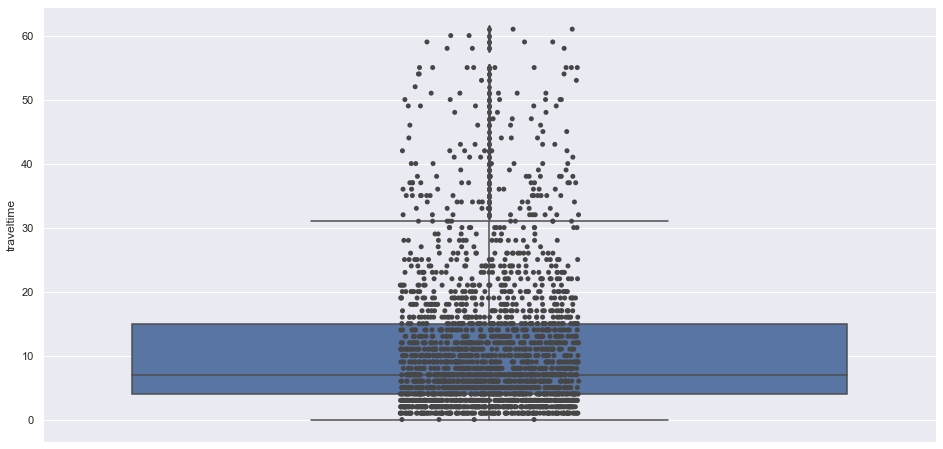

In [96]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['traveltime'])
sns.stripplot(y=df['traveltime'], data=df, color="#474646")

In [53]:
df.averagevehiclespeed.max()

104

# 4- Dealing With Missing Values 

In [161]:
df.isna().mean()

datetime                 0.000000
averagevehiclespeed      0.000000
traveltime               0.000000
traveltimereliability    0.000000
trafficstatus            0.000000
geo_point_2d             0.052765
geo_shape                0.052765
gml_id                   0.052765
id                       0.052765
func_class               0.052765
denomination             0.114394
High_Speed               0.000000
Medium_Speed             0.000000
Low_Speed                0.000000
Location_Status          0.550865
Location_ID              0.000000
lat                      0.052765
long                     0.052765
Suburb                   0.364289
dtype: float64

In [162]:
def missing(data,cat='median'):
    catg_colm = ['denomination','Suburb','Region']
    num_colm = ['Location_ID','id','func_class','id','gml_id','lat','long']
    try:
        if data in num_colm and cat == 'mean':
            return df[data].mean()
        elif data in num_colm and cat == 'median':
            return df[data].median()
        elif data in catg_colm and cat == 'mode':
            return df[data].mode()[0]
    except:
        return np.nan

#  First : For Numerical Data

## Checking The Index of The Missing Values

In [163]:
# From This Code We deduce that the indicies where the geo_point_2d are Nan Values are the same as the last 6 rows 
# Thus We Noticed That the one who miss entered these rows has also left all the last 6 rows as Nan Values
# Thus We Can Simply Remove Them as they don't represent except  0.052765 or 125 from 2369 from all the Data Set

df.loc[df['geo_point_2d'].isna()]

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
26,2022-06-24 12:55:00+02:00,10,41,58,congested,NaN,NaN,NaN,NaN,NaN,NaN,0,0,10,D,491126,NaN,NaN,NaN
27,2022-06-24 12:55:00+02:00,38,12,68,heavy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,38,G,491126,NaN,NaN,NaN
45,2022-06-24 12:55:00+02:00,23,8,20,heavy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,23,D,56204,NaN,NaN,NaN
46,2022-06-24 12:55:00+02:00,43,2,50,freeFlow,NaN,NaN,NaN,NaN,NaN,NaN,112,0,0,G,56204,NaN,NaN,NaN
63,2022-06-24 12:55:00+02:00,89,3,57,freeFlow,NaN,NaN,NaN,NaN,NaN,NaN,89,0,0,NaN,46262,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,2022-06-24 12:55:00+02:00,79,17,0,freeFlow,NaN,NaN,NaN,NaN,NaN,NaN,0,79,0,G,9090,NaN,NaN,NaN
2349,2022-06-24 12:55:00+02:00,27,9,60,congested,NaN,NaN,NaN,NaN,NaN,NaN,0,0,27,D,9745,NaN,NaN,NaN
2350,2022-06-24 12:55:00+02:00,82,3,0,freeFlow,NaN,NaN,NaN,NaN,NaN,NaN,82,0,0,G,9745,NaN,NaN,NaN
2355,2022-06-24 12:55:00+02:00,65,31,60,freeFlow,NaN,NaN,NaN,NaN,NaN,NaN,0,65,0,D,9834,NaN,NaN,NaN


## Get The Location index for all the NaN Values

In [164]:
idx = df.loc[df['geo_point_2d'].isna()].index
idx

Int64Index([  26,   27,   45,   46,   63,   90,   93,   94,  160,  161,
            ...
            2279, 2280, 2290, 2291, 2296, 2297, 2349, 2350, 2355, 2356],
           dtype='int64', length=125)

## Dropping Rows of Nan Values

In [165]:
df.drop(idx,axis=0,inplace=True )
df

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
0,2022-06-24 12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
2,2022-06-24 12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,0,0,49,NaN,9918,48.040525302267426,-1.6839897411468427,Châtillon-sur-Seiche
2365,2022-06-24 12:55:00+02:00,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,0,53,0,NaN,9919,48.03973408291705,-1.684216716754925,Châtillon-sur-Seiche
2366,2022-06-24 12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche
2367,2022-06-24 12:55:00+02:00,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,0,77,0,G,9921,48.040342468946484,-1.680835142460134,Châtillon-sur-Seiche


In [166]:
# Checking That We Dropped The UnWanted Rows
idx = df.loc[df['geo_point_2d'].isna()].index
idx

Int64Index([], dtype='int64')

In [167]:
df.isna().sum()

datetime                    0
averagevehiclespeed         0
traveltime                  0
traveltimereliability       0
trafficstatus               0
geo_point_2d                0
geo_shape                   0
gml_id                      0
id                          0
func_class                  0
denomination              146
High_Speed                  0
Medium_Speed                0
Low_Speed                   0
Location_Status          1264
Location_ID                 0
lat                         0
long                        0
Suburb                    738
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2368
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   datetime               2244 non-null   datetime64[ns, pytz.FixedOffset(120)]
 1   averagevehiclespeed    2244 non-null   int64                                
 2   traveltime             2244 non-null   int64                                
 3   traveltimereliability  2244 non-null   int64                                
 4   trafficstatus          2244 non-null   object                               
 5   geo_point_2d           2244 non-null   object                               
 6   geo_shape              2244 non-null   object                               
 7   gml_id                 2244 non-null   object                               
 8   id                     2244 non-null   float64                      

## Second:  Categorical Data 

In [169]:
# AS We Can see here The denomination column has NaN Values only on it's column 
# Thus We can't just drop it as it will result of removing more valuable data from the Other Coloumns as they are all having the same index
# In Order To OverCome This Problem we shall replace These Missing Values by the Most_frequent method from Simple Imputer in the SK-Learn Library 
df.loc[df['denomination'].isna()]

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
85,2022-06-24 12:55:00+02:00,42,2,12,freeFlow,"48.11776905272185,-1.7138392102432445","{""coordinates"": [[[-1.7139935866, 48.117810847...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_aa7,1420.0,666.0,NaN,0,0,42,NaN,491877,48.11776905272185,-1.7138392102432445,Villejean - Beauregard
116,2022-06-24 12:55:00+02:00,43,1,12,freeFlow,"48.117855827149874,-1.714027496982935","{""coordinates"": [[[-1.7140475236, 48.117908008...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_b63,1608.0,666.0,NaN,0,0,43,NaN,53944,48.117855827149874,-1.714027496982935,Villejean - Beauregard
154,2022-06-24 12:55:00+02:00,20,12,45,congested,"48.080527623267315,-1.7944973057785267","{""coordinates"": [[[-1.7942083493, 48.080703709...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_533,24.0,666.0,NaN,0,0,20,NaN,13514,48.080527623267315,-1.7944973057785267,NaN
155,2022-06-24 12:55:00+02:00,41,4,40,freeFlow,"48.08012936971373,-1.7943573961527395","{""coordinates"": [[[-1.7945602804, 48.080229661...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_534,25.0,666.0,NaN,0,0,41,NaN,13515,48.08012936971373,-1.7943573961527395,NaN
156,2022-06-24 12:55:00+02:00,55,2,0,freeFlow,"48.080697104876094,-1.7940964067306622","{""coordinates"": [[[-1.7939857995, 48.080678743...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_535,26.0,666.0,NaN,0,55,0,NaN,13516,48.080697104876094,-1.7940964067306622,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2022-06-24 12:55:00+02:00,51,4,75,freeFlow,"48.040289739702416,-1.6836209055659097","{""coordinates"": [[[-1.683464936, 48.0401142156...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e04,2281.0,666.0,NaN,0,51,0,NaN,9912,48.040289739702416,-1.6836209055659097,Châtillon-sur-Seiche
2358,2022-06-24 12:55:00+02:00,48,3,100,freeFlow,"48.03998527220697,-1.6841647971647506","{""coordinates"": [[[-1.6842415149, 48.040140342...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e05,2282.0,666.0,NaN,0,0,48,NaN,9913,48.03998527220697,-1.6841647971647506,Châtillon-sur-Seiche
2359,2022-06-24 12:55:00+02:00,27,3,100,heavy,"48.0398604833151,-1.6838635370082398","{""coordinates"": [[[-1.6840225478, 48.039878057...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e06,2283.0,666.0,NaN,0,0,27,NaN,9914,48.0398604833151,-1.6838635370082398,Châtillon-sur-Seiche
2360,2022-06-24 12:55:00+02:00,36,3,100,heavy,"48.03996927949149,-1.683557191811759","{""coordinates"": [[[-1.6837039987, 48.039872639...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e07,2284.0,666.0,NaN,0,0,36,NaN,9915,48.03996927949149,-1.683557191811759,Châtillon-sur-Seiche


In [170]:
df['Location_Status'].isna().sum()

1264

In [171]:
df['denomination'].mode()

0    Route départementale 34
dtype: object

In [172]:
mode1 = missing(data='denomination',cat='mode')
df['denomination'].fillna(mode1,inplace=True)
mode3 = missing(data='Suburb',cat='mode')
df['Suburb'].fillna(mode3,inplace=True)

In [173]:
m = df['Location_Status'].mode()[0]

In [174]:
mode4 = missing(data='Location_Status',cat='mode')
df['Location_Status'].fillna(m,inplace=True)

In [175]:
df.isna().sum()

datetime                 0
averagevehiclespeed      0
traveltime               0
traveltimereliability    0
trafficstatus            0
geo_point_2d             0
geo_shape                0
gml_id                   0
id                       0
func_class               0
denomination             0
High_Speed               0
Medium_Speed             0
Low_Speed                0
Location_Status          0
Location_ID              0
lat                      0
long                     0
Suburb                   0
dtype: int64

In [176]:
df

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,High_Speed,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb
0,2022-06-24 12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,0,0,46,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,0,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard
2,2022-06-24 12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,0,0,47,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,0,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,0,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,0,0,49,D,9918,48.040525302267426,-1.6839897411468427,Châtillon-sur-Seiche
2365,2022-06-24 12:55:00+02:00,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,0,53,0,D,9919,48.03973408291705,-1.684216716754925,Châtillon-sur-Seiche
2366,2022-06-24 12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,0,64,0,D,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche
2367,2022-06-24 12:55:00+02:00,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,0,77,0,G,9921,48.040342468946484,-1.680835142460134,Châtillon-sur-Seiche


In [75]:
len(df['denomination'].unique())

149

In [76]:
len(df['Suburb'].unique())

19

In [195]:
df['Realiable'] = df['traveltimereliability'].apply(lambda x: x if x<20 else np.nan)

In [200]:
df['Realiable'].value_counts()

0.0     325
12.0     34
17.0     19
10.0     17
5.0      14
7.0      13
15.0     12
2.0       7
Name: Realiable, dtype: int64

In [184]:
df['Moderately'] = df['traveltimereliability'].apply(lambda x: x if x>20 and x<40 else 0)

In [186]:
df['Non_Realiable'] = df['traveltimereliability'].apply(lambda x: x if x>40 else 0)

In [183]:
df['Realiable'].unique()

array([ 0, 15, 17, 12,  5,  2, 10,  7], dtype=int64)

In [187]:
df['Non_Realiable'].unique()

array([  0,  48,  60,  75,  52,  57,  73,  50,  53,  90,  99, 100,  95,
        70,  86,  61,  45,  88,  96,  94,  49,  55,  65,  42,  83,  59,
        62,  63,  68,  97,  91,  66,  74,  80,  76,  46,  98,  56,  71,
        67,  58,  47,  72,  41,  93,  54,  43,  44,  69,  89,  92],
      dtype=int64)

In [185]:
df['Moderately'].unique()

array([ 0, 25, 22, 30, 38, 27, 35, 29, 39, 32, 37], dtype=int64)

In [196]:
df

,datetime,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,...,Medium_Speed,Low_Speed,Location_Status,Location_ID,lat,long,Suburb,Realiable,Moderately,Non_Realiable
0,2022-06-24 12:55:00+02:00,46,6,0,freeFlow,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,...,0,46,D,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard,0.0,0,0
1,2022-06-24 12:55:00+02:00,43,6,48,freeFlow,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,...,0,43,G,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard,NaN,0,48
2,2022-06-24 12:55:00+02:00,47,8,0,freeFlow,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,...,0,47,D,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard,0.0,0,0
3,2022-06-24 12:55:00+02:00,43,9,48,freeFlow,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,...,0,43,G,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard,NaN,0,48
4,2022-06-24 12:55:00+02:00,40,5,0,freeFlow,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,...,0,40,D,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2022-06-24 12:55:00+02:00,49,3,60,freeFlow,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,...,0,49,D,9918,48.040525302267426,-1.6839897411468427,Châtillon-sur-Seiche,NaN,0,60
2365,2022-06-24 12:55:00+02:00,53,3,75,freeFlow,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,...,53,0,D,9919,48.03973408291705,-1.684216716754925,Châtillon-sur-Seiche,NaN,0,75
2366,2022-06-24 12:55:00+02:00,64,23,60,freeFlow,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,...,64,0,D,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche,NaN,0,60
2367,2022-06-24 12:55:00+02:00,77,19,0,freeFlow,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,...,77,0,G,9921,48.040342468946484,-1.680835142460134,Châtillon-sur-Seiche,0.0,0,0


In [202]:
df.to_csv('new1.csv')

# ENCODING

#  First: Encoding Orderd Data 

## Encoding Using Label Encoder ( Ordinal Encoder )

In [114]:
df['trafficstatus'].unique()

array(['freeFlow', 'heavy', 'congested'], dtype=object)

In [115]:
# Creating a lsit of values for the traffic Status in a dictionry
traffic_dict = {'freeFlow' : 0,
                'heavy' : 1,
                'congested' : 2}
# For Reversing the keys and vlues of the dictionary to retrive the encoded values using copmrehension for loop
rev_traffic_dict = {value: key for key, value in traffic_dict.items()}

In [116]:
df['trafficstatus'] = df['trafficstatus'].map(traffic_dict)
df['trafficstatus']

0       0
1       0
2       0
3       0
4       0
       ..
2364    0
2365    0
2366    0
2367    0
2368    0
Name: trafficstatus, Length: 2244, dtype: int64

In [117]:
df['trafficstatus'].value_counts()

0    1296
1     756
2     192
Name: trafficstatus, dtype: int64

# Second: Encoding Nominal Data

## Encoding Using One Hot Encoder

In [118]:
dum = pd.get_dummies(df,columns=['Location_Status'])
df = pd.concat([df,dum], axis=1)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2368
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   datetime               2244 non-null   datetime64[ns, pytz.FixedOffset(120)]
 1   averagevehiclespeed    2244 non-null   int64                                
 2   traveltime             2244 non-null   int64                                
 3   traveltimereliability  2244 non-null   int64                                
 4   trafficstatus          2244 non-null   int64                                
 5   geo_point_2d           2244 non-null   object                               
 6   geo_shape              2244 non-null   object                               
 7   gml_id                 2244 non-null   object                               
 8   id                     2244 non-null   float64                      

##  Removing Duplicated Columns

In [120]:
df = df.iloc[: , 17:]
df

,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,Location_ID,lat,long,Suburb,Location_Status_D,Location_Status_G
0,46,6,0,0,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,213972,48.116190538539584,-1.718545510658931,Villejean - Beauregard,1,0
1,43,6,48,0,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,213972,48.116082711620635,-1.718538472331696,Villejean - Beauregard,0,1
2,47,8,0,0,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,213973,48.116226254263346,-1.7173307312721042,Villejean - Beauregard,1,0
3,43,9,48,0,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,213973,48.11611841267346,-1.7173241774343833,Villejean - Beauregard,0,1
4,40,5,0,0,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,213974,48.116187195570035,-1.719459815131283,Bourg l'Évesque - La Touche - Moulin du Comte,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,49,3,60,0,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,9918,48.040525302267426,-1.6839897411468427,Châtillon-sur-Seiche,1,0
2365,53,3,75,0,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,9919,48.03973408291705,-1.684216716754925,Châtillon-sur-Seiche,1,0
2366,64,23,60,0,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,9921,48.04023708494653,-1.6808048996880336,Châtillon-sur-Seiche,1,0
2367,77,19,0,0,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,9921,48.040342468946484,-1.680835142460134,Châtillon-sur-Seiche,0,1


In [121]:
df['func_class'].value_counts()

666.0    2244
Name: func_class, dtype: int64

In [122]:
len(df['Suburb'].unique())

19

In [123]:
len(df['denomination'].unique())

149

##  Encoding Using Binary Encoder Method

In [124]:
import category_encoders as ce

In [125]:
binary = ce.BinaryEncoder()
new_bin = binary.fit_transform(df['denomination'])
df = pd.concat([df,new_bin], axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2368
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   averagevehiclespeed    2244 non-null   int64  
 1   traveltime             2244 non-null   int64  
 2   traveltimereliability  2244 non-null   int64  
 3   trafficstatus          2244 non-null   int64  
 4   geo_point_2d           2244 non-null   object 
 5   geo_shape              2244 non-null   object 
 6   gml_id                 2244 non-null   object 
 7   id                     2244 non-null   float64
 8   func_class             2244 non-null   float64
 9   denomination           2244 non-null   object 
 10  Location_ID            2244 non-null   object 
 11  lat                    2244 non-null   object 
 12  long                   2244 non-null   object 
 13  Suburb                 2244 non-null   object 
 14  Location_Status_D      2244 non-null   uint8  
 15  Loca

In [127]:
df

,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,geo_point_2d,geo_shape,gml_id,id,func_class,denomination,...,Location_Status_D,Location_Status_G,denomination_0,denomination_1,denomination_2,denomination_3,denomination_4,denomination_5,denomination_6,denomination_7
0,46,6,0,0,"48.116190538539584,-1.718545510658931","{""coordinates"": [[[-1.7180070988, 48.116206297...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c7,172.0,666.0,Rue de Vezin,...,1,0,0,0,0,0,0,0,0,1
1,43,6,48,0,"48.116082711620635,-1.718538472331696","{""coordinates"": [[[-1.7190768831, 48.116066952...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c8,173.0,666.0,Rue de Vezin,...,0,1,0,0,0,0,0,0,0,1
2,47,8,0,0,"48.116226254263346,-1.7173307312721042","{""coordinates"": [[[-1.7166550485, 48.116246999...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5c9,174.0,666.0,Rue de Vezin,...,1,0,0,0,0,0,0,0,0,1
3,43,9,48,0,"48.11611841267346,-1.7173241774343833","{""coordinates"": [[[-1.7180007244, 48.116098452...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5ca,175.0,666.0,Rue de Vezin,...,0,1,0,0,0,0,0,0,0,1
4,40,5,0,0,"48.116187195570035,-1.719459815131283","{""coordinates"": [[[-1.719076505, 48.116174768]...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_5cb,176.0,666.0,Rue de Vezin,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,49,3,60,0,"48.040525302267426,-1.6839897411468427","{""coordinates"": [[[-1.6838498971, 48.040374582...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0b,2288.0,666.0,Route nationale 137,...,1,0,1,0,0,1,0,0,0,0
2365,53,3,75,0,"48.03973408291705,-1.684216716754925","{""coordinates"": [[[-1.6843803098, 48.039555987...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0c,2289.0,666.0,Route nationale 137,...,1,0,1,0,0,1,0,0,0,0
2366,64,23,60,0,"48.04023708494653,-1.6808048996880336","{""coordinates"": [[[-1.6834659511, 48.040060254...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0d,2290.0,666.0,Route départementale 34,...,1,0,0,0,0,0,1,0,0,1
2367,77,19,0,0,"48.040342468946484,-1.680835142460134","{""coordinates"": [[[-1.678247524, 48.0408297586...",v_rva_troncon_fcd.fid--4dfc3f8_181947d620a_e0e,2291.0,666.0,Route départementale 34,...,0,1,0,0,0,0,1,0,0,1


## Preparing DataSet For Feature Scalling 

In [128]:
df.drop(['geo_point_2d','geo_shape','gml_id','id','lat','long','Suburb','Location_ID','func_class','denomination'],axis=1,inplace=True)
df

,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,Location_Status_D,Location_Status_G,denomination_0,denomination_1,denomination_2,denomination_3,denomination_4,denomination_5,denomination_6,denomination_7
0,46,6,0,0,1,0,0,0,0,0,0,0,0,1
1,43,6,48,0,0,1,0,0,0,0,0,0,0,1
2,47,8,0,0,1,0,0,0,0,0,0,0,0,1
3,43,9,48,0,0,1,0,0,0,0,0,0,0,1
4,40,5,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,49,3,60,0,1,0,1,0,0,1,0,0,0,0
2365,53,3,75,0,1,0,1,0,0,1,0,0,0,0
2366,64,23,60,0,1,0,0,0,0,0,1,0,0,1
2367,77,19,0,0,0,1,0,0,0,0,1,0,0,1


# Feature Scalling 

###  Using Robust Scaler

In [129]:
from sklearn.preprocessing import RobustScaler

In [130]:
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [131]:
df

array([[ 0.125     , -0.09756098, -1.37931034, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.09756098, -0.27586207, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667,  0.09756098, -1.37931034, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.875     ,  1.56097561,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.41666667,  1.17073171, -1.37931034, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.48780488, -0.22988506, ...,  0.        ,
         0.        ,  0.        ]])

In [132]:
df = pd.DataFrame(df,columns=['averagevehiclespeed','traveltime','traveltimereliability','trafficstatus','Location_Status_D','Location_Status_G','denomination_0','denomination_1','denomination_2','denomination_3','denomination_4','denomination_5','denomination_6','denomination_7'])
df

,averagevehiclespeed,traveltime,traveltimereliability,trafficstatus,Location_Status_D,Location_Status_G,denomination_0,denomination_1,denomination_2,denomination_3,denomination_4,denomination_5,denomination_6,denomination_7
0,0.125000,-0.097561,-1.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
1,0.000000,-0.097561,-0.275862,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
2,0.166667,0.097561,-1.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
3,0.000000,0.195122,-0.275862,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
4,-0.125000,-0.195122,-1.379310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0.250000,-0.390244,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
2240,0.416667,-0.390244,0.344828,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
2241,0.875000,1.560976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2242,1.416667,1.170732,-1.379310,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
